<h1 style="text-align: center; color: #000; font-family: 'Arial Black', sans-serif; background-image: linear-gradient(to right, #FFC0CB, #B39BC8); -webkit-background-clip: text; -webkit-text-fill-color: transparent; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Super Market Data Exploratory Analysis</h1>



<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
  Importing the required libraries
</h2>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
 Fetching the Data
</h2>



In [2]:
df=pd.read_csv("supermarket")

<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
  Preview of Data
</h2>


In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
101,189-98-2939,C,Naypyitaw,Normal,Male,Fashion accessories,78.55,9,35.3475,742.2975,3/1/2019,13:22,Cash,706.95,4.761905,35.3475,7.2
364,272-27-9238,C,Naypyitaw,Normal,Female,Food and beverages,41.24,4,8.2480,173.2080,2/19/2019,16:23,Cash,164.96,4.761905,8.2480,7.1
689,305-03-2383,A,Yangon,Normal,Female,Food and beverages,67.10,3,10.0650,211.3650,2/15/2019,10:36,Cash,201.30,4.761905,10.0650,7.5
183,824-88-3614,C,Naypyitaw,Normal,Male,Health and beauty,34.31,8,13.7240,288.2040,1/25/2019,15:00,Ewallet,274.48,4.761905,13.7240,5.7
967,195-06-0432,A,Yangon,Member,Male,Home and lifestyle,81.01,3,12.1515,255.1815,1/13/2019,12:55,Credit card,243.03,4.761905,12.1515,9.3


In [4]:
df["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [5]:
df.groupby(["City"])["Branch"].unique()

City
Mandalay     [B]
Naypyitaw    [C]
Yangon       [A]
Name: Branch, dtype: object

In [6]:
df.drop(columns=["Branch"],inplace=True)

In [7]:
df["gross margin percentage"].unique()

array([4.76190476])

<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
 Fetching the shape of Data
</h2>


In [8]:
df.shape

(1000, 16)

<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
  Fetching the column names
</h2>


In [9]:
df.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
  Fetching the dtypes of data
</h2>



In [10]:
df.dtypes

Invoice ID                  object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [12]:
df.isnull().sum().sum()

0

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    Observations
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 0;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 18px;
               display: flex;
               align-items: center;">
      <span style="display: inline-block;
                   width: 12px;
                   height: 12px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 12px;"></span>
      <span style="font-weight: bold;">from the above output we can infer that there are no missing values in my data</span>
    </li>
    <li style="margin-bottom: 18px;
               display: flex;
               align-items: center;">
      <span style="display: inline-block;
                   width: 12px;
                   height: 12px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 12px;"></span>
      <span style="font-weight: bold;">so there is no need of handling the missing values</span>
    </li>
  </ul>
</div>


<h2 style="font-size: 28px;
           color: #333;
           text-align: center;
           border-bottom: 2px solid #ccc;
           text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
           padding-bottom: 5px;">
 Checking the inconsistencies of Data
</h2>


# seggeragating the object data and numeric data

In [13]:
df_obj=df.select_dtypes(include="object")
df_obj

,Invoice ID,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [14]:
for i in df_obj.columns:
    if i != "Invoice ID":
        print(i, "....", df[i].unique().tolist(), "\n has", df_obj[i].nunique(), "values")

    

City .... ['Yangon', 'Naypyitaw', 'Mandalay'] 
 has 3 values
Customer type .... ['Member', 'Normal'] 
 has 2 values
Gender .... ['Female', 'Male'] 
 has 2 values
Product line .... ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories'] 
 has 6 values
Date .... ['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019', '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019', '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019', '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019', '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019', '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019', '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019', '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019', '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019', '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019', '1/13/2019', '1/9/2019', 

In [15]:
df_numeric=df.select_dtypes(exclude="object")
df_numeric.head(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6


In [16]:
index=0
for i in df_numeric.columns:
    if ((df.loc[index,i]==0) | (df.loc[index,i]<0)):
        print("yes")
        
    
        
    
        print(i, "....", df_numeric[i].unique().tolist(), "\n has", df_numeric[i].nunique(), "values")

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    Observations
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 0;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 18px;
               display: flex;
               align-items: center;">
      <span style="display: inline-block;
                   width: 12px;
                   height: 12px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 12px;"></span>
      <span style="font-weight: bold;">from the above output we can infer that there are no inconsistencies in my data</span>
    </li>
  </ul>
</div>


# Feature Engineering

In [17]:
#Feature extraction

In [18]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])

C:\Users\Shagun\AppData\Local\Temp\ipykernel_6944\2384983477.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


In [19]:
df.dtypes

Invoice ID                         object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [20]:
df["month"] = df["Date"].dt.month_name()
df["day"] = df["Date"].dt.day
df["year"] = df["Date"].dt.year
df["Hour"] = df["Time"].dt.hour
df["day_name"] = df["Date"].dt.day_name()


In [21]:
df.head(4)

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,Payment,cogs,gross margin percentage,gross income,Rating,month,day,year,Hour,day_name
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,Ewallet,522.83,4.761905,26.1415,9.1,January,5,2019,13,Saturday
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,Cash,76.40,4.761905,3.8200,9.6,March,8,2019,10,Friday
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,Credit card,324.31,4.761905,16.2155,7.4,March,3,2019,13,Sunday
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,Ewallet,465.76,4.761905,23.2880,8.4,January,27,2019,20,Sunday


# Now we will drop the Invoice ID column since it is irrelevant and has nothing to do with my insights

In [22]:
df.drop(columns=["Invoice ID"],inplace=True)

# Insights

# Descriptive Stats

In [ ]:
df.describe().T

In [ ]:

len(df_numeric.columns)

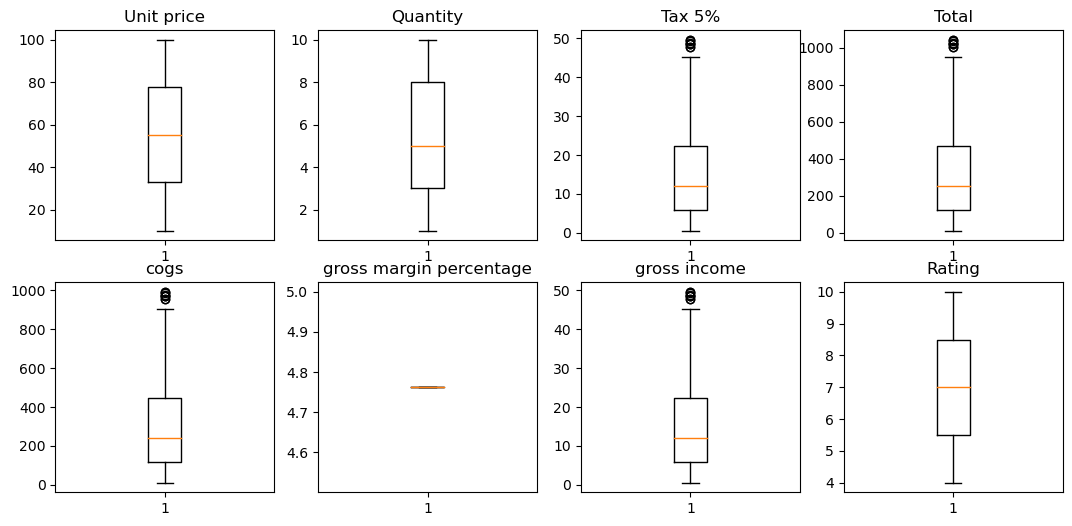

In [29]:
pos=1
plt.figure(figsize=(13,6))
for col in df_numeric.columns:
    plt.subplot(2,4,pos)
    plt.boxplot(df[col])
    plt.title(col)
    pos=pos+1


<Axes: >

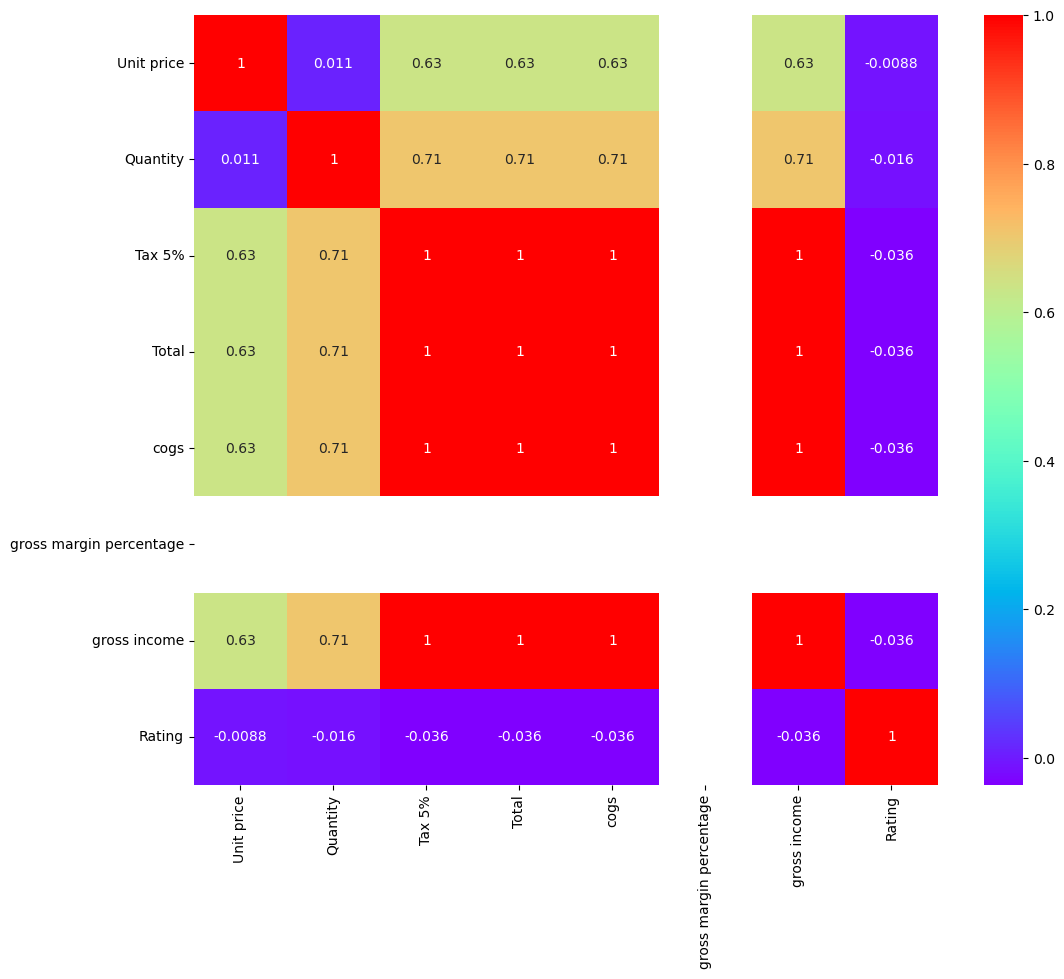

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(),annot=True,cmap="rainbow")

In [ ]:
 df.columns

In [ ]:
df.drop(columns=["Tax 5%", "cogs", "gross income", "gross margin percentage"], inplace=True)


In [ ]:
df.shape

In [ ]:
df.head(2)

# Total sale of the company

In [ ]:
df["Total"].sum()

# Total sale of each city

In [ ]:
df.groupby(["City"])["Total"].agg(["sum"])

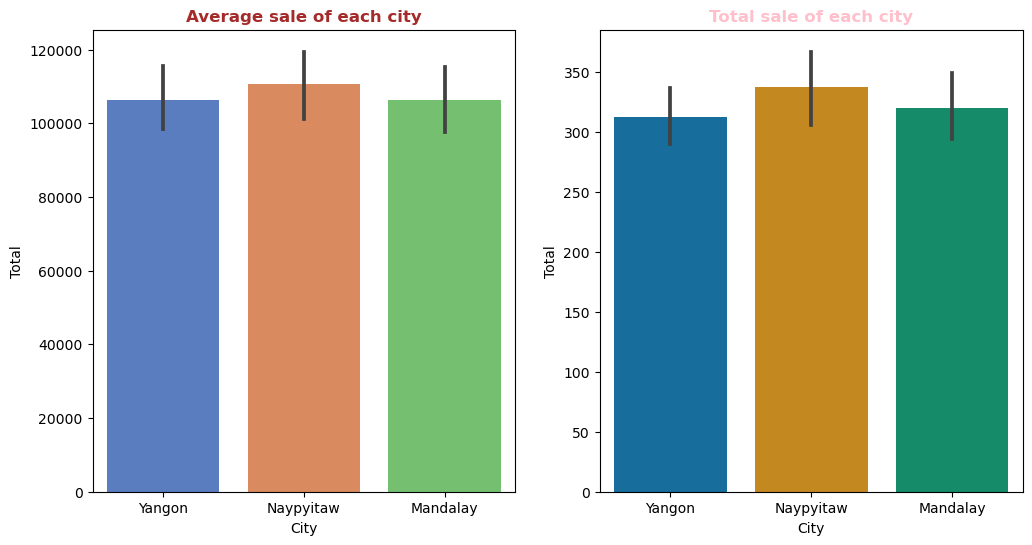

In [27]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=df["City"], y=df["Total"], estimator=sum,palette="muted")
plt.title("Average sale of each city", color="brown", fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(x=df["City"], y=df["Total"],palette="colorblind")
plt.title("Total sale of each city", fontweight="bold", color="pink")

plt.show()


<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 0;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 18px;
               display: flex;
               align-items: center;">
      <span style="display: inline-block;
                   width: 12px;
                   height: 12px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 12px;"></span>
      <span style="font-weight: bold;">from the above ouput we can infer that naypaytaw is found to be the hot selling branch</span>
    </li>
  </ul>
</div>


Since naypaytaw is the hot selling branch so we are fetching the details of naypaytaw

# Highest sale on any day

In [ ]:
df_n=df[df["City"]=="Naypyitaw"]
df_n[df_n["Total"]==df_n["Total"].max()]

In [ ]:
df_n[df_n["Total"]==df_n["Total"].max()].iloc[0]

In [ ]:
df.head(2)

figuring out the reason behind the highest sale on the basis of two contexts 

In [ ]:
df.groupby(["City"])["Rating"].median()

Use the median in Python when you want a robust measure of central tendency that is less sensitive to outliers or for skewed distributions.

since,here rating is found to be almost so rating is not considered as a root cause for the same

In [ ]:
df.groupby(["City"])["Customer type"].value_counts()

<Axes: xlabel='City', ylabel='count'>

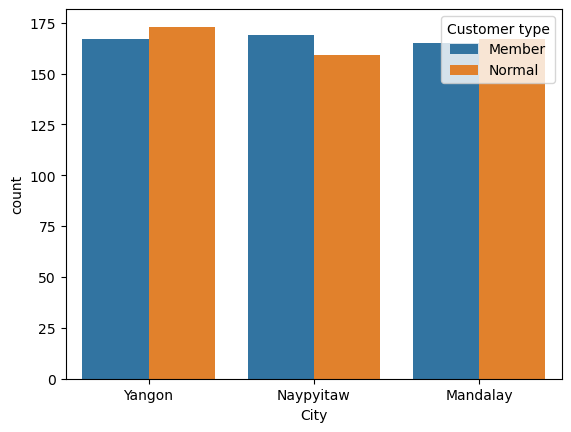

In [26]:
 sns.countplot(x="City",data=df,hue="Customer type")

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;">
    <li style="font-size: 18px;
               color: #666;
               margin-bottom: 8px;">
      Supermarkets are getting more revenue from the memberships
    </li>
    <li style="font-size: 18px;
               color: #666;
               margin-bottom: 8px;">
      Suggest ways to attract more customers to sign up for memberships, such as marketing campaigns, referral programs, or promotional events.
    </li>
    <li style="font-size: 18px;
               color: #666;
               margin-bottom: 8px;">
    Identify unique selling points and areas for improvement in the membership offering.
    </li>
  </ul>
</div>


# Find the highest buisness reveneue month of the company

In [ ]:
df.columns

<Axes: xlabel='month', ylabel='Total'>

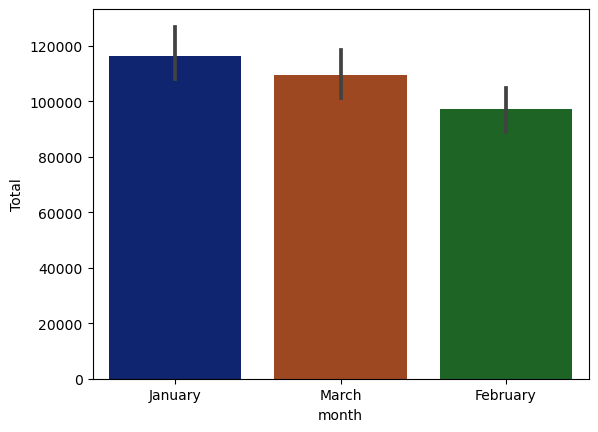

In [24]:
sns.barplot(x="month",y="Total",data=df,estimator=sum,palette="dark")

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 0;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 18px;
               display: flex;
               align-items: center;">
      <span style="display: inline-block;
                   width: 12px;
                   height: 12px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 12px;"></span>
      <span style="font-weight: bold;">Highest buisness revenue month is January</span>
    </li>
  </ul>
</div>


In [ ]:
df.groupby("month")["Total"].agg("sum").to_frame


# Calculating the percentage of revenue month wise

Text(0.5, 1.0, 'Hot selling  month of the company')

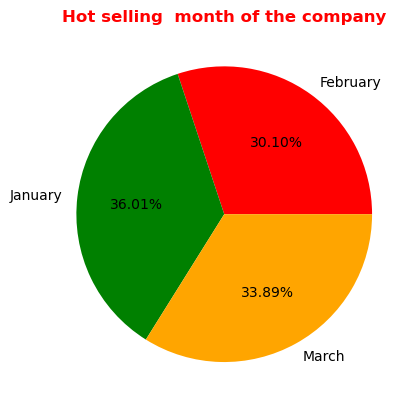

In [30]:
plt.pie(df.groupby(["month"])["Total"].agg(["sum"])["sum"],labels=df.groupby(["month"])["Total"].agg(["sum"]).index,autopct="%.2f%%",colors=["red","green","orange"])
plt.title("Hot selling  month of the company",fontsize=12,color="Red",fontweight="bold")

# Find the highest buisness/revenue of each city/branch

In [33]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'month', 'day',
       'year', 'Hour', 'day_name'],
      dtype='object')

In [36]:
df.groupby(["City","month"])["Total"].agg(["sum"])

sum
City      month               
Mandalay  February  34424.2710
          January   37176.0585
          March     34597.3425
Naypyitaw February  32934.9825
          January   40434.6810
          March     37199.0430
Yangon    February  29860.1205
          January   38681.1285
          March     37659.1215

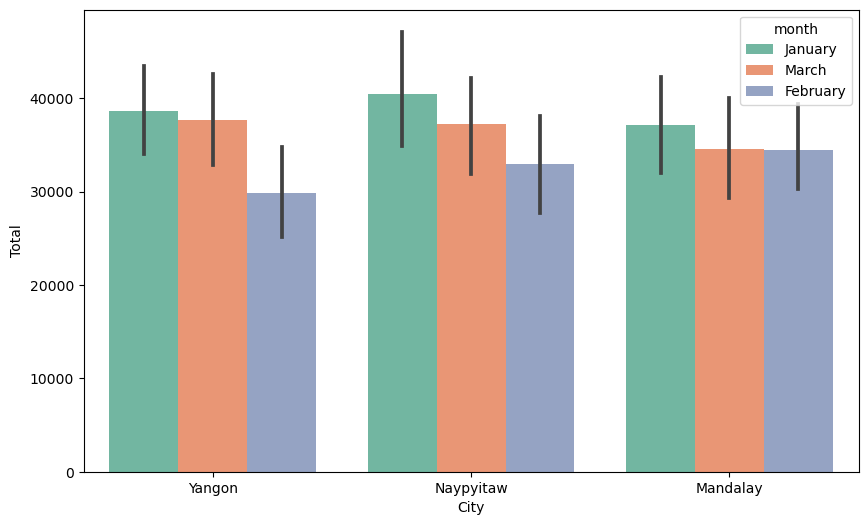

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="Set2",hue="month");

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      We generated the highest revenue in the month of january from all the branches
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
    January is often associated with post-holiday sales and promotions. Consider whether the higher revenue is a result of specific events, clearance sales, or promotional activities during this time.
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      Check if there were specific marketing campaigns or promotions during January that attracted more customers. Special discounts, loyalty programs, or advertising can contribute to increased sales.
    </li
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
                    January is a month when people often make resolutions, including those related to health and wellness. If your supermarkets sell products related to these resolutions (e.g., healthy foods, fitness equipment), this could explain the increased revenue.
                    </li

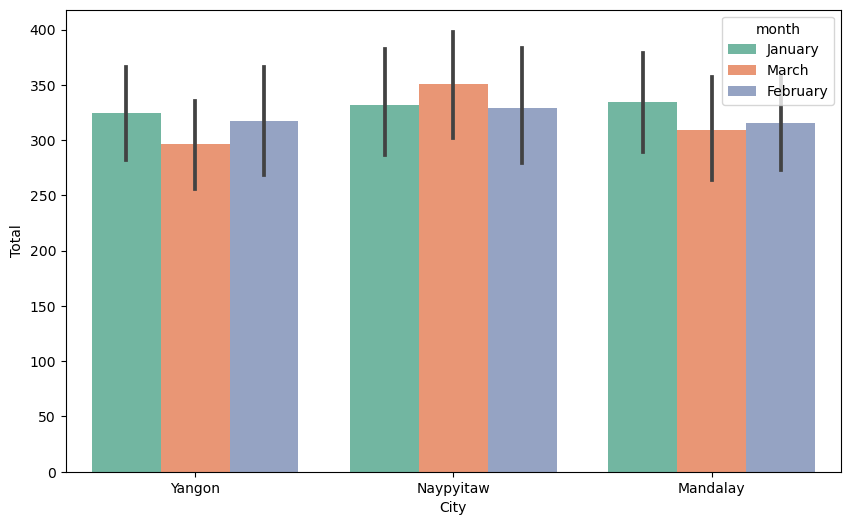

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x="City",y="Total",data=df,palette="Set2",hue="month");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

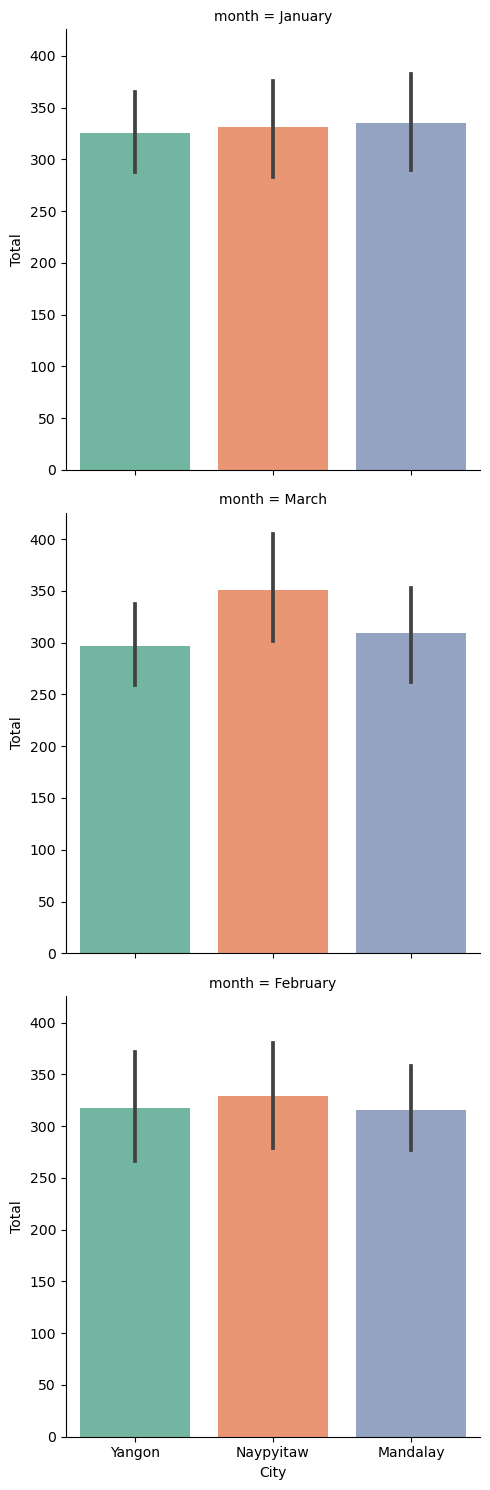

In [40]:
plt.figure(figsize=(10,6))
sns.catplot(x="City",y="Total",data=df,palette="Set2",row="month",kind="bar");

# Sale trend of company over the three months

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

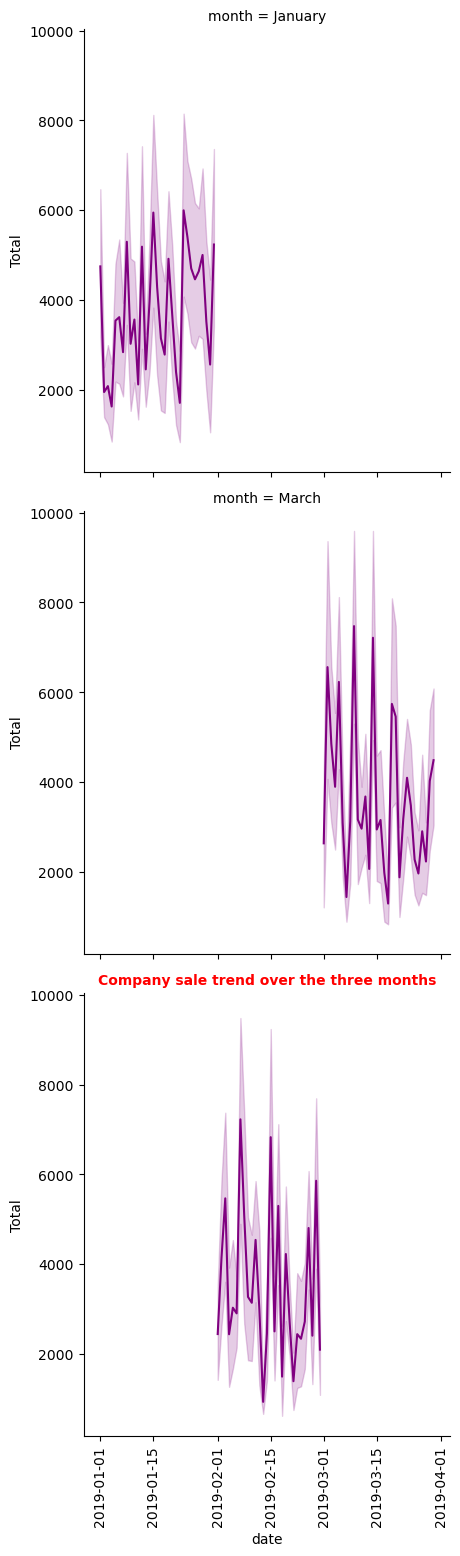

In [46]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="purple",estimator="sum",row="month")
plt.xlabel("date")
plt.title("Company sale trend over the three months",fontsize=10,color="red",fontweight="bold")
plt.xticks(rotation=90);

# Sale Trend of each Branch

In [48]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'month', 'day',
       'year', 'Hour', 'day_name'],
      dtype='object')

In [51]:
df.head(2)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,year,Hour,day_name
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-01-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,5,2019,13,Saturday
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-01-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,8,2019,10,Friday


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(17897.0, 0, '2019-01-01'),
  Text(17911.0, 0, '2019-01-15'),
  Text(17928.0, 0, '2019-02-01'),
  Text(17942.0, 0, '2019-02-15'),
  Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01')])

<Figure size 1500x500 with 0 Axes>

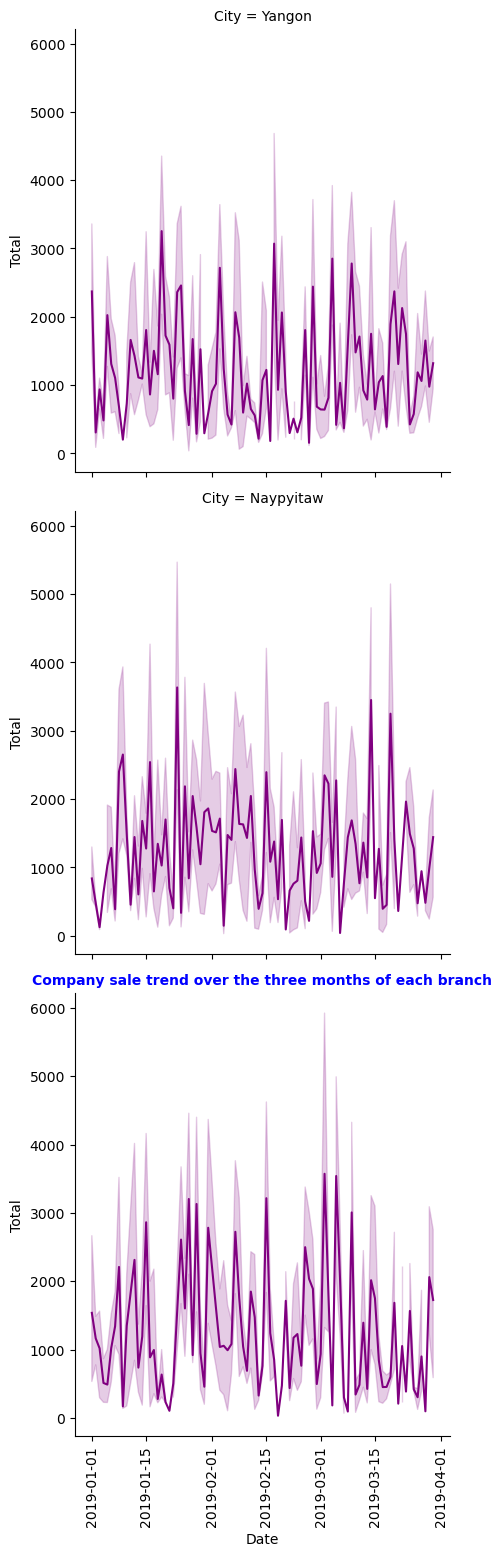

In [52]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,estimator="sum",kind="line",color="purple",row="City")
plt.title("Company sale trend over the three months of each branch",fontsize=10,color="blue",fontweight="bold")
plt.xticks(rotation=90)


<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;">
    <li style="font-size: 18px;
               color: #666;
               margin-bottom: 8px;">
      The sale had been down on 2 february and high on 4 february
    </li>
  </ul>
</div>


# Customer visiting trend of each branch/city at each month

In [62]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [64]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'month', 'day',
       'year', 'Hour', 'day_name'],
      dtype='object')

Text(0.5, 1.0, 'March')

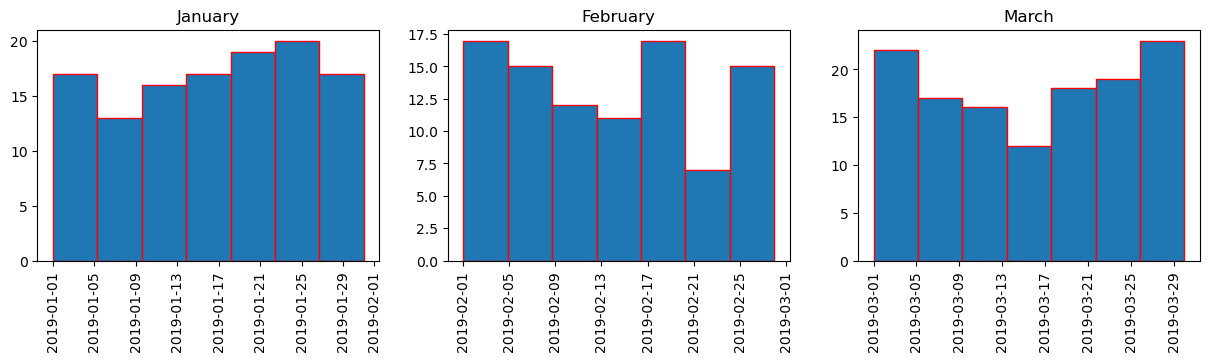

In [66]:
plt.figure(figsize=(15,3))
a=df[(df["City"]=="Yangon")]
a_jan=a[a["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation=90)
plt.title("January")
a_feb=a[a["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation=90)
plt.title("February")
a_march=a[a["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation=90)
plt.title("March")

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;">
    <li style="font-size: 18px;
               color: #666;
               margin-bottom: 8px;">
      We got the insight that customers visited most in all the branches in the last week 
    </li>
  </ul>
</div>


# Hot Selling Day

In [70]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'month', 'day',
       'year', 'Hour', 'day_name'],
      dtype='object')

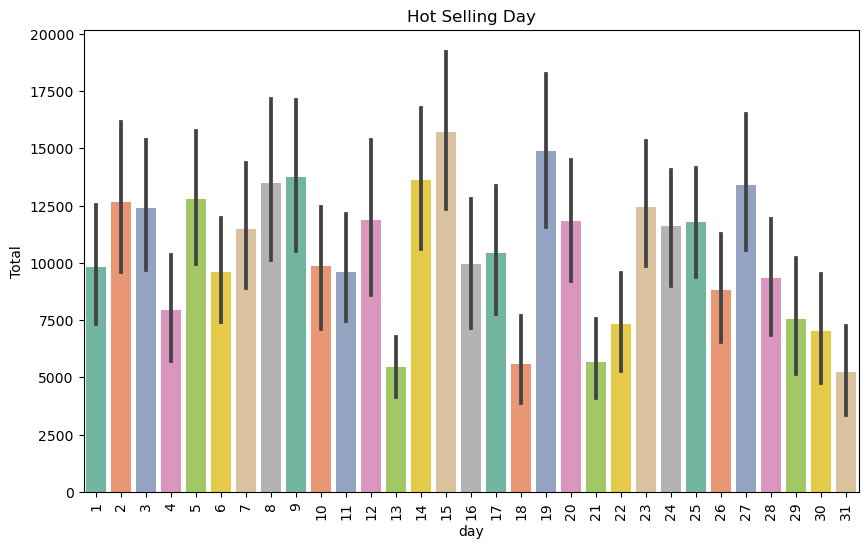

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x="day",y="Total",data=df,estimator=sum,palette="Set2")
plt.xticks(rotation=90)
plt.title("Hot Selling Day");

We will find out hot selling day of each city/branch as it is not helpful in providing any valuable insight for the business

# Hot selling day of each branch/city

In [72]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [73]:
n=df[df["City"]=="Naypyitaw"]
y=df[df["City"]=="Yangon"]
m=df[df["City"]=="Mandalay"]

In [74]:
n

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,year,Hour,day_name
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-01-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,8,2019,10,Friday
5,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2024-01-16 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,March,25,2019,18,Monday
7,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,2024-01-16 11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,February,24,2019,11,Sunday
20,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,2024-01-16 11:24:00,Ewallet,430.20,4.761905,21.5100,4.8,February,25,2019,11,Monday
34,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,2024-01-16 10:42:00,Ewallet,397.68,4.761905,19.8840,7.5,February,6,2019,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,2024-01-16 10:33:00,Cash,699.72,4.761905,34.9860,6.1,January,23,2019,10,Wednesday
984,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,2019-01-09,2024-01-16 11:40:00,Cash,674.59,4.761905,33.7295,6.0,January,9,2019,11,Wednesday
988,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,2019-03-29,2024-01-16 19:12:00,Ewallet,823.40,4.761905,41.1700,4.3,March,29,2019,19,Friday
994,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,2024-01-16 11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,February,18,2019,11,Monday


['Yangon' 'Naypyitaw' 'Mandalay']


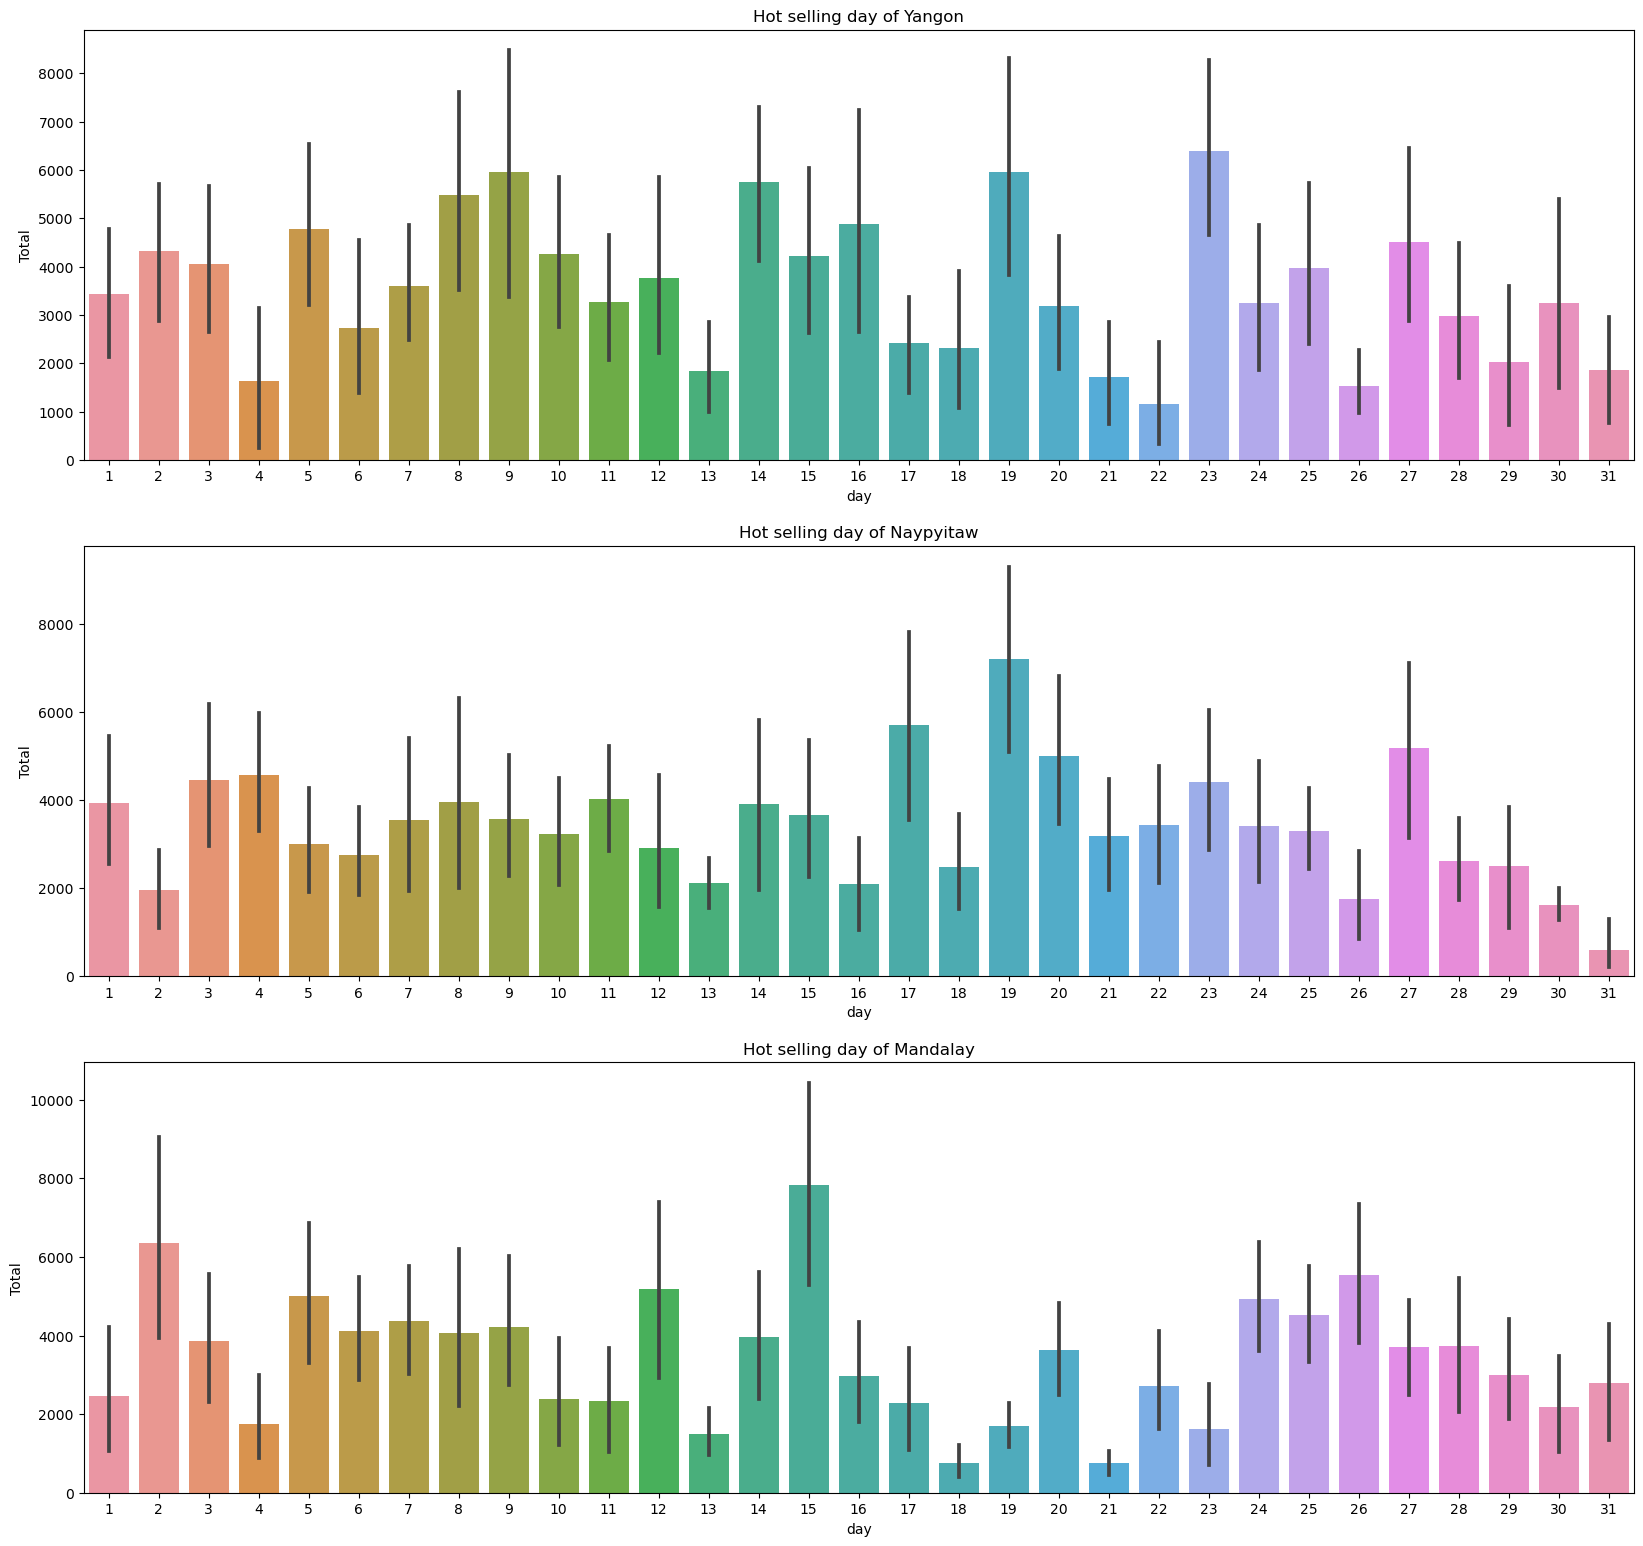

In [79]:
city=[n,y,m]
city_name=df["City"].unique()
print(city_name)
pos=1
plt.figure(figsize=(20,19))
for c in city:
    plt.subplot(3,1,pos)
    sns.barplot(x="day",y="Total",data=c,estimator=sum)
    plt.title(f"Hot selling day of {city_name[pos-1]}")
    pos=pos+1
    

# Find total weekdays and weekends sale

In [84]:
df["weekend/weekday"]=df["day_name"].apply(lambda x:"weekend" if ((x=="Saturday") | (x=="Sunday")) else "weekday")

In [85]:
df.sample(3)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,...,cogs,gross margin percentage,gross income,Rating,month,day,year,Hour,day_name,weekend/weekday
854,Yangon,Member,Female,Health and beauty,95.95,5,23.9875,503.7375,2019-01-23,2024-01-16 14:21:00,...,479.75,4.761905,23.9875,8.8,January,23,2019,14,Wednesday,weekday
681,Mandalay,Normal,Female,Sports and travel,34.81,1,1.7405,36.5505,2019-01-14,2024-01-16 10:11:00,...,34.81,4.761905,1.7405,7.0,January,14,2019,10,Monday,weekday
357,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.7200,1002.1200,2019-01-09,2024-01-16 13:45:00,...,954.40,4.761905,47.7200,5.2,January,9,2019,13,Wednesday,weekday


<Axes: xlabel='weekend/weekday', ylabel='count'>

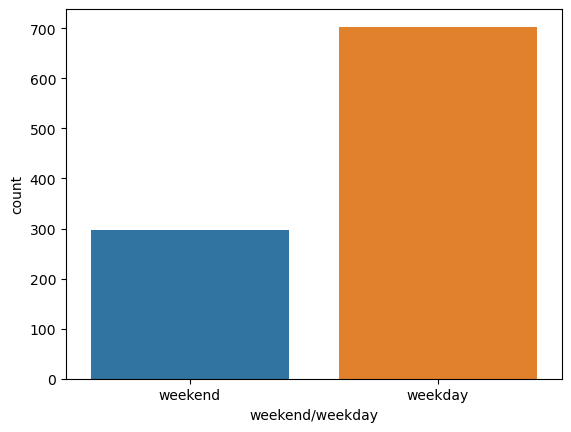

In [86]:
sns.countplot(x="weekend/weekday",data=df)

For every Branch

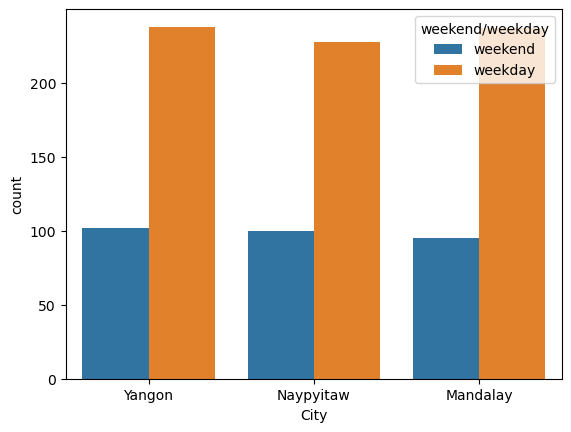

In [88]:
sns.countplot(x="City",data=df,hue="weekend/weekday");

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      We can infer that the weekdays have generated more revenue in all the three branches as compared to weekends
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
    Weekdays might see more customers making quick trips for lunch or on their way home from work. Ensure that your store is well-stocked with convenient and quick-to-prepare items to cater to this customer segment.
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      Evaluate whether specific weekday promotions or discounts contribute to the higher revenue. If certain promotions are more effective on weekdays, consider optimizing your marketing efforts during those days.
    </li
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
                    January is a month when people often make resolutions, including those related to health and wellness. If your supermarkets sell products related to these resolutions (e.g., healthy foods, fitness equipment), this could explain the increased revenue.
                    </li

In [89]:
df.groupby(["City","month","weekend/weekday"])["Total"].agg(["sum"])

sum
City      month    weekend/weekday            
Mandalay  February weekday          25964.4525
                   weekend           8459.8185
          January  weekday          27634.8870
                   weekend           9541.1715
          March    weekday          20898.5805
                   weekend          13698.7620
Naypyitaw February weekday          21950.5020
                   weekend          10984.4805
          January  weekday          30470.0550
                   weekend           9964.6260
          March    weekday          23041.4310
                   weekend          14157.6120
Yangon    February weekday          20417.2395
                   weekend           9442.8810
          January  weekday          25736.4870
                   weekend          12944.6415
          March    weekday          26274.4125
                   weekend          11384.7090

# Find the most populated/most demanding product

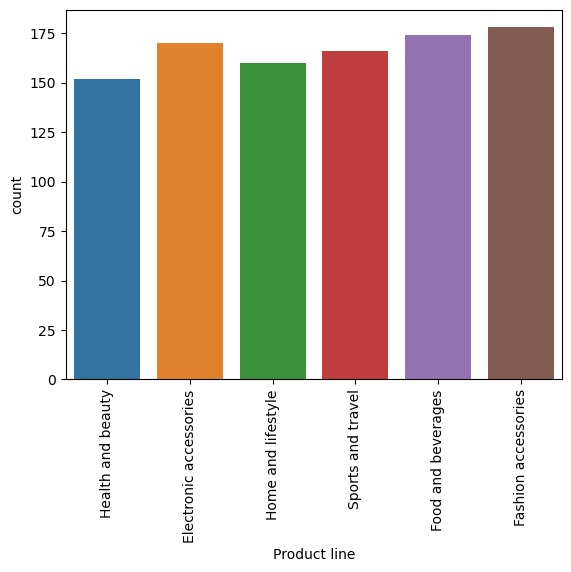

In [92]:
sns.countplot(x="Product line",data=df)
plt.xticks(rotation=90);

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      We can infer that fashion accessories is the most populated product 
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
    Keep the stocks of fashion accessories sufficient and Stay informed about fashion trends and update your inventory accordingly. Regularly introduce new styles and designs to keep your product offerings fresh and aligned with the latest fashion trends.
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      Enhance your online presence with a user-friendly and visually appealing website. Implement an efficient e-commerce platform to reach a wider audience and provide convenient online shopping options.
    </li
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
                    January is a month when people often make resolutions, including those related to health and wellness. If your supermarkets sell products related to these resolutions (e.g., healthy foods, fitness equipment), this could explain the increased revenue.
                    </li

# Most populated product of each Branch

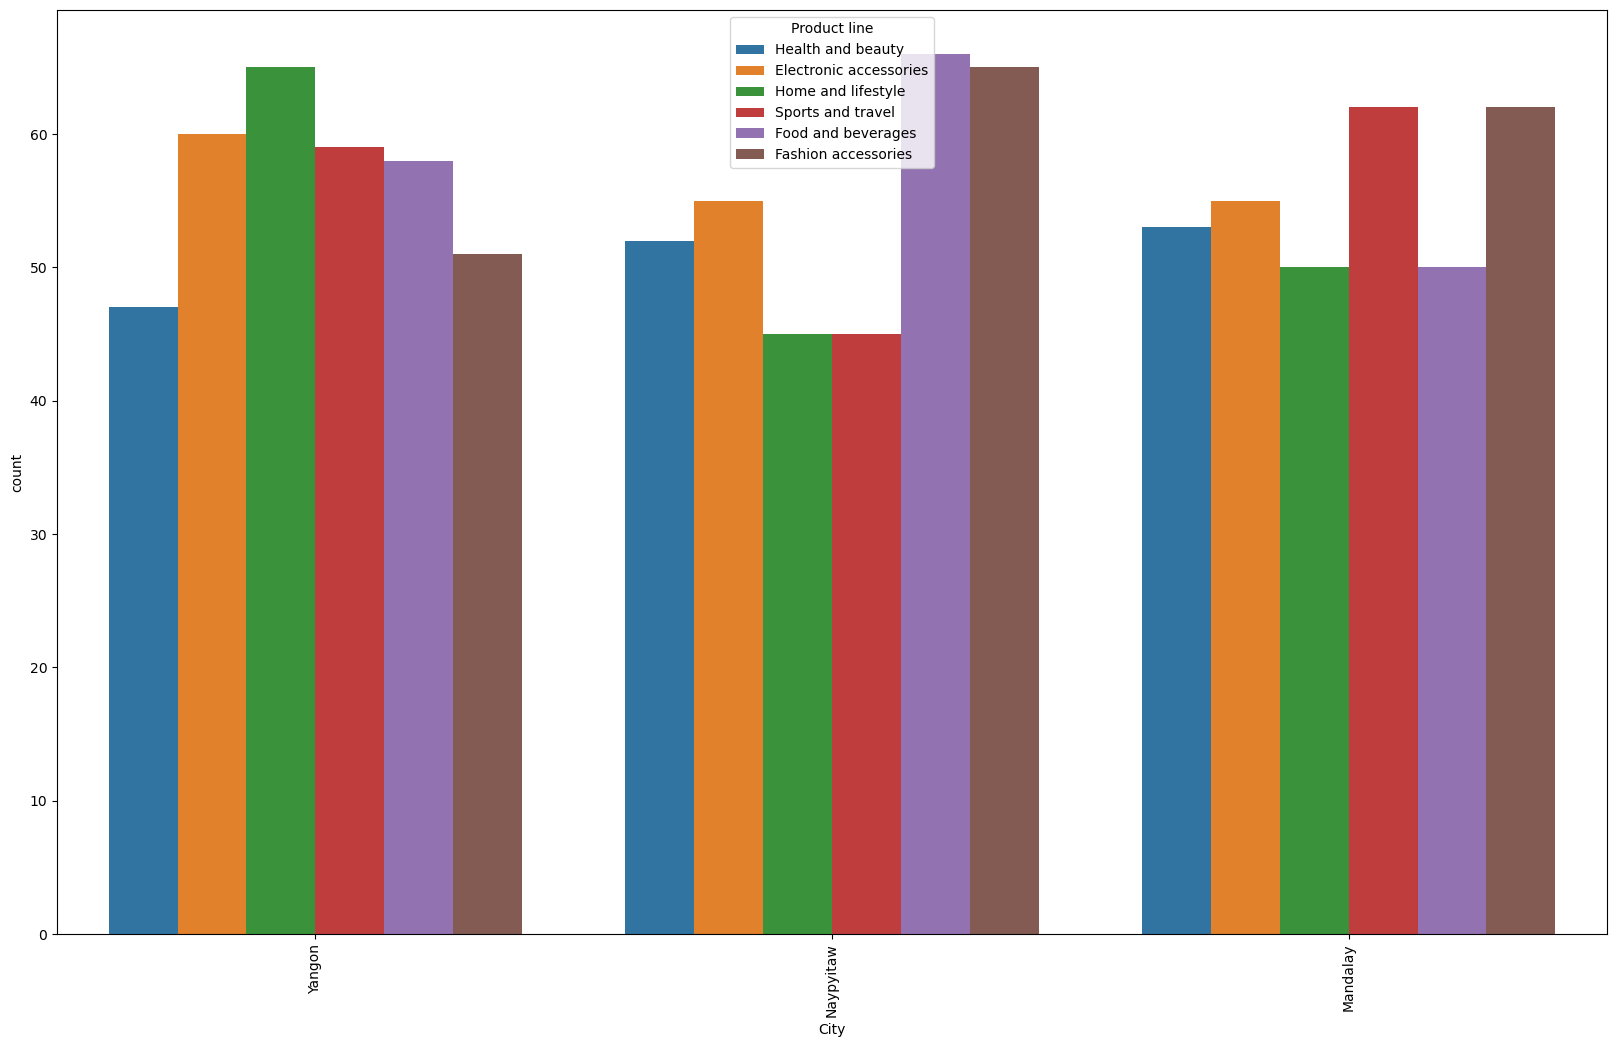

In [93]:
plt.figure(figsize=(20,12))
sns.countplot(x="City",data=df,hue="Product line")
plt.xticks(rotation=90);

We infer that home and lifestyle is the most populated product in yangon
Food and beverages is the most populated product in naypyitaw
Fashion accessories is the most populated product in mandalay

# Find the most revenue generating product of the company

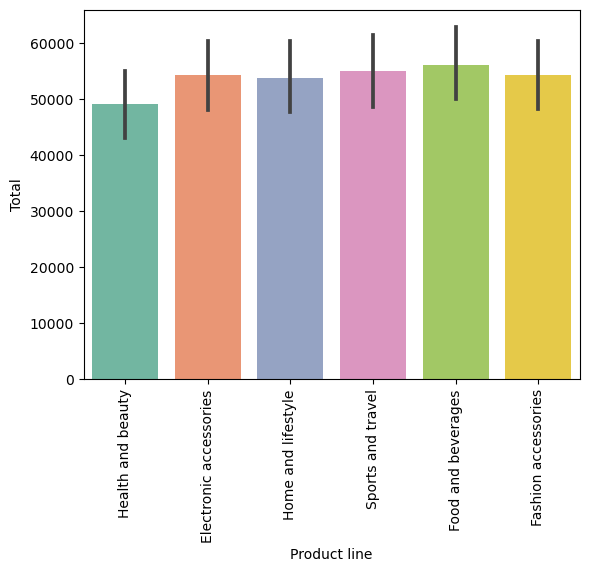

In [94]:
sns.barplot(x="Product line",y="Total",estimator=sum,data=df,palette="Set2")
plt.xticks(rotation=90);

Food and beverages is the most revenue generating product for the company

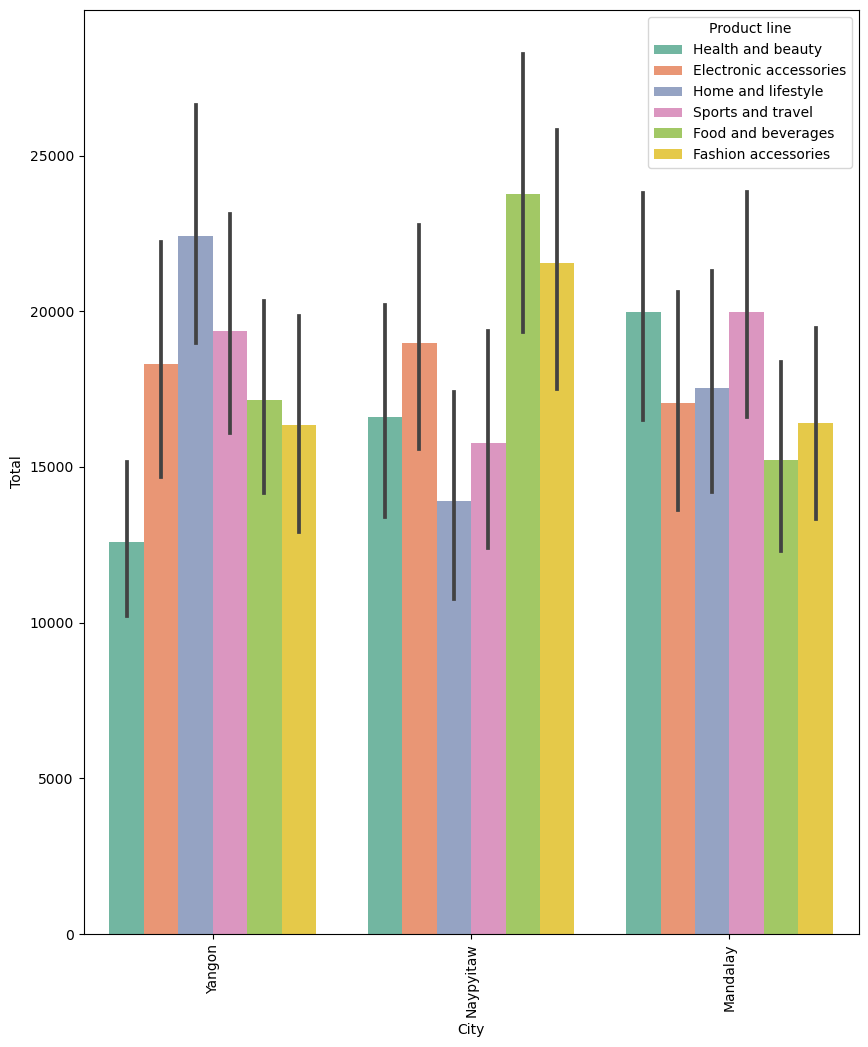

In [95]:
plt.figure(figsize=(10,12))
sns.barplot(x="City",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line")
plt.xticks(rotation=90);

Home and lifestyle is the most revenue generation product for yangon
Food and beverages is the most revenue generating product for the naypyitaw
Sport and travel and Health and beauty is the most revenue generating product for mandalay

# Most demanding product Monthwise

In [96]:
df.groupby(["City","month"])["Product line"].value_counts()

City       month     Product line          
Mandalay   February  Fashion accessories       24
                     Sports and travel         19
                     Electronic accessories    19
                     Food and beverages        17
                     Health and beauty         16
                     Home and lifestyle        14
           January   Sports and travel         23
                     Fashion accessories       21
                     Food and beverages        19
                     Electronic accessories    18
                     Health and beauty         16
                     Home and lifestyle        14
           March     Home and lifestyle        22
                     Health and beauty         21
                     Sports and travel         20
                     Electronic accessories    18
                     Fashion accessories       17
                     Food and beverages        14
Naypyitaw  February  Food and beverages        24
      

# Find monthly sale of each product of all branch

In [97]:
df.groupby(["City","Product line","month"])["Total"].sum()

City       Product line            month   
Mandalay   Electronic accessories  February     6686.2530
                                   January      6699.7770
                                   March        3665.4135
           Fashion accessories     February     6137.1135
                                   January      6112.5960
                                   March        4163.6070
           Food and beverages      February     5554.8150
                                   January      6609.2775
                                   March        3050.7960
           Health and beauty       February     5856.4275
                                   January      6399.8865
                                   March        7724.3460
           Home and lifestyle      February     4659.8475
                                   January      4586.4420
                                   March        8302.8750
           Sports and travel       February     5529.8145
                            

# Find the total number of customers

In [99]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

Total customers: 1000


<Axes: xlabel='Gender', ylabel='count'>

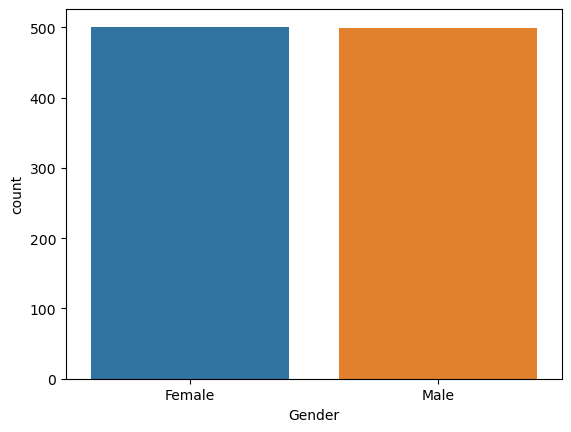

In [101]:

print("Total customers:", df["Gender"].count())
sns.countplot(x="Gender", data=df)


total customers: 1000


<Axes: xlabel='City', ylabel='count'>

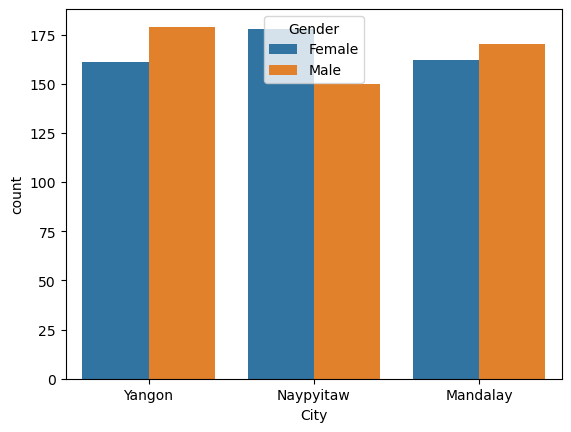

In [103]:
print("total customers:",df["Gender"].count())
sns.countplot(x="City",data=df,hue="Gender")

Naypyitaw generated higher buisness revenue from females

In [104]:
df["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

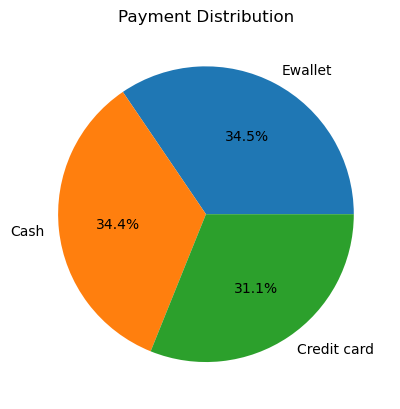

In [106]:

payment_counts = df["Payment"].value_counts()
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title("Payment Distribution")
plt.show()


pie chart for each branch

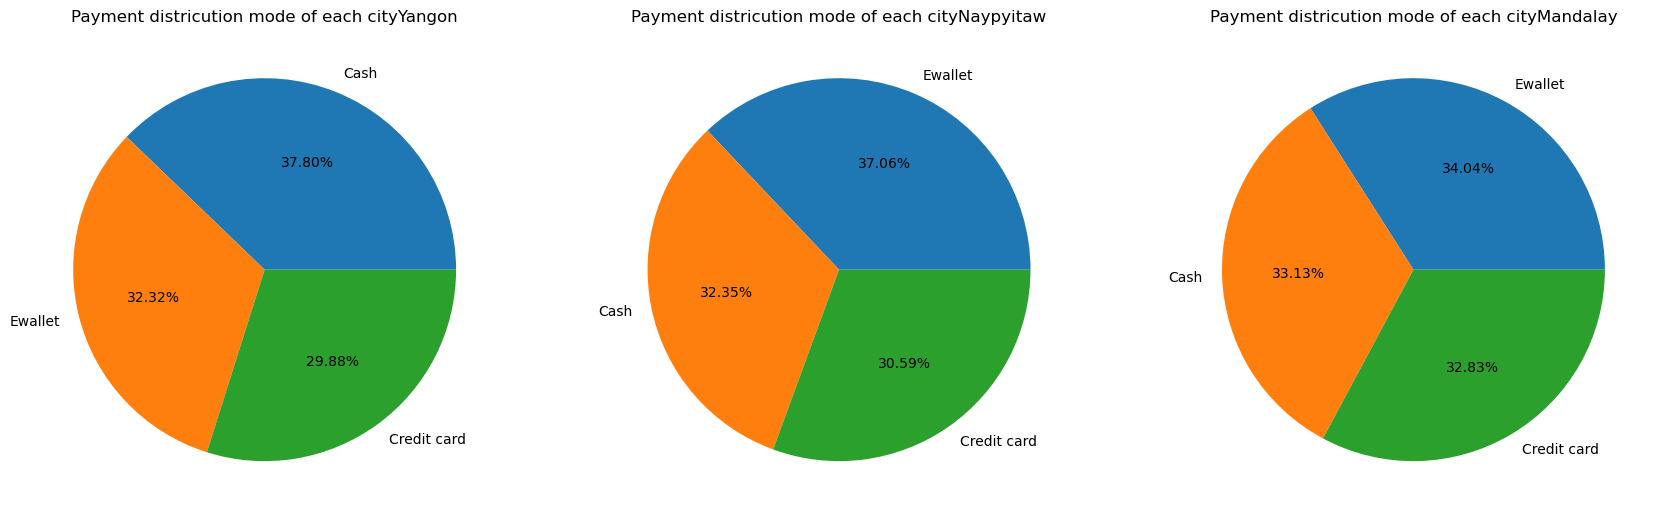

In [111]:
plt.figure(figsize=(21,20))
pos=1
for i in city:
    plt.subplot(1,3,pos)
    plt.pie(i["Payment"].value_counts().values,labels=i["Payment"].value_counts().index,autopct="%.2f%%")
    plt.title(f"Payment districution mode of each city{city_name[pos-1]}")
    pos=pos+1

# Peak Hour

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x900 with 0 Axes>

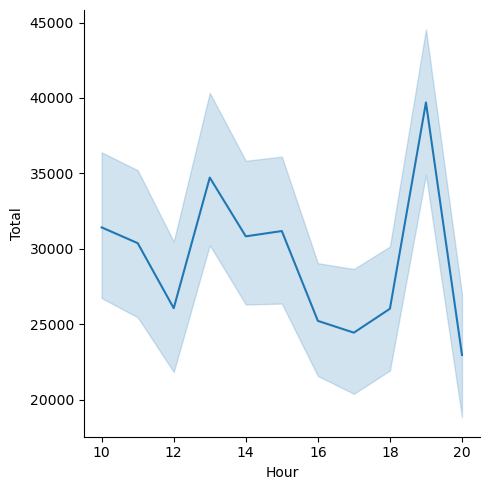

In [115]:
plt.figure(figsize=(17,9))
sns.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line");

<div style="margin-bottom: 20px;">
  <h2 style="font-size: 28px;
             color: #333;
             text-align: center;
             border-bottom: 2px solid #ccc;
             text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
             padding-bottom: 5px;">
    INSIGHTS
  </h2>

  <ul style="list-style-type: none;
             margin-left: 0;
             padding-left: 20px;
             font-size: 18px;
             color: #666;">
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
      We can infer that sale iss high at 7 and low at 5
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
     Ensure that you have adequate staffing levels during the peak hour to provide excellent customer service. Having enough staff can help manage increased customer flow efficiently.
    </li>
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
     Consider organizing special events or promotions specifically during the peak hour to create excitement and draw in more customers. This could include product launches, demonstrations, or limited-time discounts. 
    </li
    <li style="margin-bottom: 12px;">
      <span style="display: inline-block;
                   width: 10px;
                   height: 10px;
                   border-radius: 50%;
                   background-color: #ff758c;
                   margin-right: 10px;"></span>
                    January is a month when people often make resolutions, including those related to health and wellness. If your supermarkets sell products related to these resolutions (e.g., healthy foods, fitness equipment), this could explain the increased revenue.
                    </li

# Peak hour city wise

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x900 with 0 Axes>

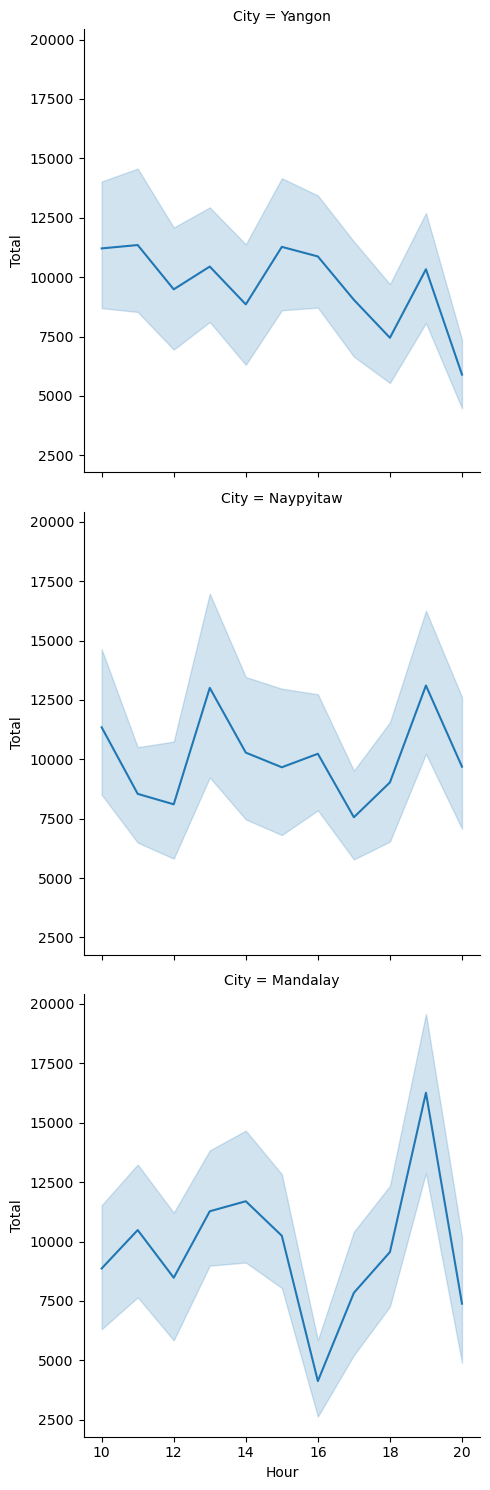

In [116]:
plt.figure(figsize=(17,9))
sns.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line",row="City");

# Rating

# How many customers have give 10 ratings

In [119]:
print(len(df[df["Rating"]==10.0]), "customer has given a rating of 10")
print(f"{(len(df[df['Rating']==10.0]) / df['Rating'].count()) * 100:.2f}% has given a rating of 10")


5 customer has given a rating of 10
0.50% has given a rating of 10


# How many customers have given 4 ratings

In [120]:
print(len(df[df["Rating"]==4.0]), "customer has given a rating of 10")
print(f"{(len(df[df['Rating']==4.0]) / df['Rating'].count()) * 100:.2f}% has given a rating of 10")

11 customer has given a rating of 10
1.10% has given a rating of 10


# How many customers have given equal to or below to 6.9 rating

In [121]:
print(len(df[df["Rating"]<=6.9]), "customer has given a rating of 10")
print(f"{(len(df[df['Rating']<=6.9]) / df['Rating'].count()) * 100:.2f}% has given a rating of 10")

499 customer has given a rating of 10
49.90% has given a rating of 10


# Find ratings by customer for each city

In [122]:
df.groupby(["City"])["Rating"].agg(["max","min","mean"])

,max,min,mean
City,,,
Mandalay,10.0,4.0,6.818072
Naypyitaw,10.0,4.0,7.072866
Yangon,10.0,4.0,7.027059


# Rating wrt each product

In [123]:
df.groupby(["Product line"])["Rating"].agg(["max","min","mean"])

,max,min,mean
Product line,,,
Electronic accessories,10.0,4.0,6.924706
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218
Health and beauty,10.0,4.0,7.003289
Home and lifestyle,9.9,4.1,6.837500
Sports and travel,10.0,4.0,6.916265


# Product rating City wise

In [124]:
df.groupby(["City","Product line"])["Rating"].agg(["max","min","mean"])

max  min      mean
City      Product line                               
Mandalay  Electronic accessories  10.0  4.0  7.116364
          Fashion accessories      9.9  4.1  6.722581
          Food and beverages       9.9  4.0  6.994000
          Health and beauty        9.9  4.0  7.100000
          Home and lifestyle       9.8  4.1  6.516000
          Sports and travel       10.0  4.1  6.509677
Naypyitaw Electronic accessories   9.8  4.1  6.747273
          Fashion accessories      9.9  4.0  7.440000
          Food and beverages       9.9  4.0  7.080303
          Health and beauty        9.9  4.1  6.998077
          Home and lifestyle       9.8  4.3  7.060000
          Sports and travel       10.0  4.0  7.028889
Yangon    Electronic accessories   9.9  4.3  6.911667
          Fashion accessories      9.9  4.0  6.878431
          Food and beverages       9.9  4.0  7.253448
          Health and beauty       10.0  4.2  6.900000
          Home and lifestyle       9.9  4.1  6.930769
          Sports and travel        9.9  4.1  7.257627

So all the three branches are running good and facing no problem wrt rating